## Spam Detection Project 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 1 Load Dataset
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print(data.head())

# Save locally as CSV
data.to_csv("spam.csv", index=False)


# 2 Preprocessing
data['label_num'] = data['label'].map({'ham':0, 'spam':1})  # Convert labels to numeric
X = data['message']
y = data['label_num']

# 3 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4 Convert text to numeric (Bag-of-Words)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5 Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 6 Evaluate Model
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7️ Save Model and Vectorizer
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("Model and vectorizer saved successfully!")

# 8 Predict New Messages
new_messages = ["Congratulations! You won a free iPhone.", "Hey, are you coming today?"]
new_vec = vectorizer.transform(new_messages)
predictions = model.predict(new_vec)

for msg, pred in zip(new_messages, predictions):
    print(msg, "->", "SPAM" if pred==1 else "HAM")


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Accuracy: 0.9919282511210762

Confusion Matrix:
 [[966   0]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Model and vectorizer saved successfully!
Congratulations! You won a free iPhone. -> SPAM
Hey, are you coming today? -> HAM



Confusion Matrix:
              Predicted HAM  Predicted SPAM
Actual HAM             966               0
Actual SPAM              9             140


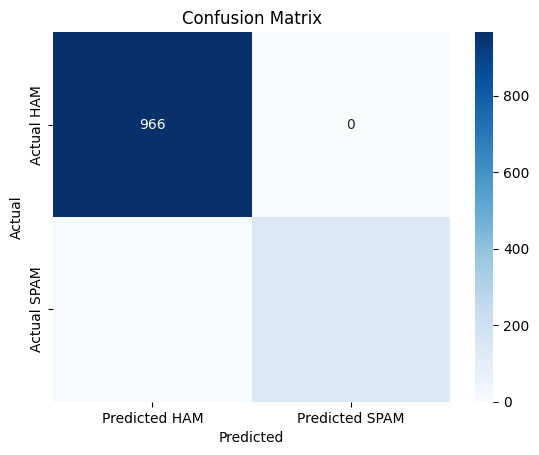

In [ ]:
# 8 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual HAM', 'Actual SPAM'],
                     columns=['Predicted HAM', 'Predicted SPAM'])
print("\nConfusion Matrix:\n", cm_df)

# 9 Visualize Confusion Matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()